<a href="https://colab.research.google.com/github/dunstanms/AI_BOOTCAMP/blob/main/Heart_Health_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heart-health-stats-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4499807%2F7707150%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240312%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240312T072652Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db154b6515f89344eb0b2b3949e98d37a8eee022e2e1131d768fd33d001dfed0dd5c90ef04c5e98bd8302c21710411bc965e5c3967712e9d90ed369b6ed68e8ca6537c33eb731950917ae5ebaebb13a3fbdb7dfd3c279d4e6fc84c2c248c65b5aa3574c125a048ea7b0e87d5da3fd38aedb9a258c7700c39a219ee0461a01b6997cd908deba0830fd7ddcad8a607b344a1efc6990ef8e396faa9f9a7fecd531bd1d3cfd74c9ffb5539d281bb925eb3e7162ffb8dd68f5a4fb0cf7c1d5643e7827319f825b81ab45d8d9d6c70819f97b3f8618df478f9e6ca4be3942092b1c24250127e00399b4dfeba852a525a19087a4e5a076d398e20318fe277bde47239f84'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4745 bytes downloaded
Downloaded and uncompressed: heart-health-stats-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-health-stats-dataset/Heart_health.csv


In [ ]:
df=pd.read_csv("/kaggle/input/heart-health-stats-dataset/Heart_health.csv")
df.head()

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


<ipython-input-11-f152f62e3cd0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Age', y='Smoker', inner='box', palette='Dark2')


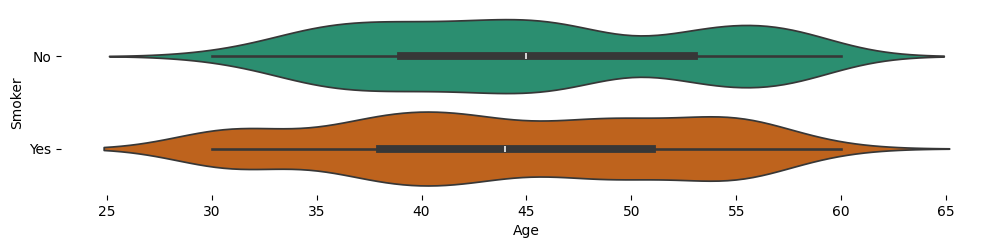

In [ ]:
# @title Smoker vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Smoker', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    724 non-null    int64 
 1   Name                  724 non-null    object
 2   Age                   724 non-null    int64 
 3   Gender                724 non-null    object
 4   Height(cm)            724 non-null    int64 
 5   Weight(kg)            724 non-null    int64 
 6   Blood Pressure(mmHg)  724 non-null    object
 7   Cholesterol(mg/dL)    724 non-null    int64 
 8   Glucose(mg/dL)        724 non-null    int64 
 9   Smoker                724 non-null    object
 10  Exercise(hours/week)  724 non-null    int64 
 11  Heart Attack          724 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 68.0+ KB


In [ ]:
df.isna().sum()

ID                      0
Name                    0
Age                     0
Gender                  0
Height(cm)              0
Weight(kg)              0
Blood Pressure(mmHg)    0
Cholesterol(mg/dL)      0
Glucose(mg/dL)          0
Smoker                  0
Exercise(hours/week)    0
Heart Attack            0
dtype: int64

In [ ]:
df.describe()

,ID,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,361.712707,44.842541,171.161602,75.610497,206.022099,92.179558,2.770718,0.599448
std,207.901609,8.162429,6.242018,6.368595,11.224704,4.662712,0.934907,0.490349
min,1.000000,30.000000,155.000000,60.000000,170.000000,75.000000,1.000000,0.000000
25%,181.750000,38.000000,166.000000,71.000000,195.000000,88.000000,2.000000,0.000000
50%,362.500000,44.000000,170.000000,75.000000,210.000000,92.000000,3.000000,1.000000
75%,543.250000,53.000000,177.000000,81.000000,215.000000,96.000000,4.000000,1.000000
max,714.000000,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000
